### Import Libraries

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, FunctionTransformer
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Loading Data

In [172]:
df = pd.read_csv('amex.csv')
df.sample(5)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
39939,CST_139111,Lionel,41,M,N,Y,0.0,110049.18,3117.0,Low-skill Laborers,1.0,0.0,28614.91,28794.23,36,830.0,0,0,0
22125,CST_139376,Sayantani,36,F,N,Y,0.0,491366.46,365242.0,Unknown,2.0,0.0,41519.61,60928.47,4,734.0,0,0,0
24488,CST_130031,Caroline,48,F,N,Y,0.0,404135.11,365243.0,Unknown,2.0,0.0,52402.33,102251.80,15,729.0,0,0,0
41490,CST_152094,Mason,29,M,N,Y,0.0,259057.06,782.0,Drivers,2.0,0.0,19532.88,44792.63,86,935.0,0,0,0
37193,CST_157580,Hepher,36,M,Y,N,0.0,153623.73,871.0,Sales staff,2.0,0.0,68772.60,56624.12,46,909.0,0,0,0


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [174]:
df.rename(columns = {'credit_card_default': 'default'}, inplace = True)

In [175]:
df.duplicated().sum()

0

In [176]:
df.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
default                      0
dtype: int64

In [177]:
# droping unnecessary columns
df.drop(columns = ['name', 'customer_id'], inplace = True)

In [178]:
df.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,default
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000,1.000000


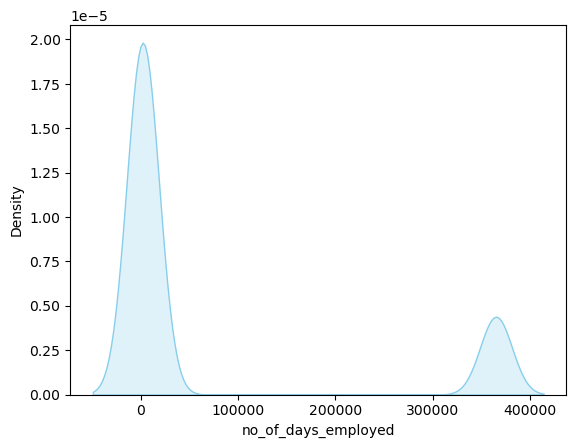

In [179]:
sns.kdeplot(df['no_of_days_employed'], fill = True, color = 'skyblue')
plt.show()

In [180]:
df[(df['age'] - 16)*365 < df['no_of_days_employed']]

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,default
3,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
8,40,F,NaN,Y,0.0,210091.43,11551.0,Laborers,2.0,0.0,21521.89,65037.74,14,783.0,0,0,0
12,39,F,N,Y,0.0,68421.10,365247.0,Unknown,2.0,0.0,13781.53,17110.01,72,643.0,1,1,1
16,24,F,N,Y,0.0,145522.37,8058.0,High skill tech staff,1.0,0.0,26365.91,29476.68,77,763.0,0,0,0
23,23,F,N,Y,2.0,217697.92,4057.0,Drivers,4.0,0.0,27509.83,48384.25,84,519.0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45510,38,F,N,Y,0.0,52827.82,365242.0,Unknown,2.0,0.0,19245.70,13756.60,13,907.0,0,0,0
45512,24,F,N,Y,0.0,140729.06,365251.0,Unknown,2.0,0.0,18350.70,15661.53,27,752.0,0,0,0
45513,49,M,N,Y,0.0,223193.44,365242.0,Unknown,2.0,0.0,19881.38,48985.19,72,940.0,0,0,0
45514,30,F,Y,Y,0.0,259793.86,5372.0,Laborers,2.0,0.0,29352.66,82582.62,83,868.0,0,0,0


In [181]:
# droping rows where 'no_of_days_employed' is more than possible days of employment
df = df[(df['age'] - 16)*365 >= df['no_of_days_employed']]

In [182]:
df.isnull().sum()

age                          0
gender                       0
owns_car                   414
owns_house                   0
no_of_children             596
net_yearly_income            0
no_of_days_employed          0
occupation_type              0
total_family_members        61
migrant_worker              57
yearly_debt_payments        78
credit_limit                 0
credit_limit_used(%)         0
credit_score                 7
prev_defaults                0
default_in_last_6months      0
default                      0
dtype: int64

In [183]:
df[df['yearly_debt_payments'].isnull()]

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,default
195,45,F,N,Y,0.0,200314.14,615.0,Security staff,2.0,1.0,NaN,34067.55,78,789.0,0,0,0
253,34,F,N,Y,0.0,141554.19,495.0,Unknown,2.0,0.0,NaN,21871.16,43,842.0,0,0,0
347,33,M,N,Y,3.0,600445.87,2110.0,Managers,5.0,1.0,NaN,148313.03,40,774.0,0,0,0
819,46,M,Y,N,1.0,89229.34,8000.0,Laborers,3.0,0.0,NaN,14702.16,26,934.0,0,0,0
1142,34,M,N,Y,2.0,109526.94,3551.0,Unknown,4.0,1.0,NaN,26312.59,93,945.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41992,28,F,N,Y,1.0,130772.33,1097.0,Sales staff,3.0,0.0,NaN,28713.38,85,636.0,1,1,1
42369,53,F,N,N,0.0,199637.58,8973.0,Core staff,2.0,0.0,NaN,28516.93,0,702.0,0,0,0
44289,50,F,N,Y,0.0,81306.27,333.0,Sales staff,2.0,0.0,NaN,15228.92,3,688.0,0,0,0
44570,27,F,Y,Y,0.0,219275.66,498.0,Unknown,1.0,0.0,NaN,40175.36,90,684.0,0,0,0


In [184]:
# droping rows with null values in 'yearly_debt_payments'
df.dropna(subset = ['yearly_debt_payments'], inplace = True)

In [185]:
df.isnull().sum()

age                          0
gender                       0
owns_car                   414
owns_house                   0
no_of_children             595
net_yearly_income            0
no_of_days_employed          0
occupation_type              0
total_family_members        61
migrant_worker              56
yearly_debt_payments         0
credit_limit                 0
credit_limit_used(%)         0
credit_score                 7
prev_defaults                0
default_in_last_6months      0
default                      0
dtype: int64

In [186]:
df[df['credit_score'].isnull()]

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,default
2428,35,M,N,N,0.0,123818.30,503.0,Drivers,2.0,0.0,29352.74,31033.98,62,NaN,0,0,0
4352,27,F,Y,Y,0.0,199174.42,2067.0,Laborers,2.0,0.0,15608.86,35796.50,68,NaN,0,0,0
7384,50,M,N,N,0.0,332714.21,1061.0,Sales staff,1.0,0.0,32973.57,52213.67,62,NaN,0,0,0
16180,24,F,N,Y,0.0,244882.10,455.0,Unknown,1.0,0.0,60867.31,63574.88,73,NaN,1,1,1
18873,42,M,Y,Y,0.0,228386.12,1382.0,Laborers,2.0,1.0,34579.76,64087.72,33,NaN,0,0,0
19951,32,F,N,Y,0.0,146287.81,1948.0,Unknown,2.0,0.0,28426.08,49628.48,48,NaN,0,0,0
35736,35,F,N,N,2.0,227682.89,4190.0,Unknown,4.0,0.0,42300.34,37956.84,46,NaN,0,0,0


In [187]:
# dropping rows with null values in 'credit_score' as they are very few
df.dropna(subset = ['credit_score'], inplace = True)

In [188]:
df.isnull().sum()

age                          0
gender                       0
owns_car                   414
owns_house                   0
no_of_children             595
net_yearly_income            0
no_of_days_employed          0
occupation_type              0
total_family_members        61
migrant_worker              56
yearly_debt_payments         0
credit_limit                 0
credit_limit_used(%)         0
credit_score                 0
prev_defaults                0
default_in_last_6months      0
default                      0
dtype: int64

In [189]:
df['total_family_members'].value_counts()

total_family_members
2.0     16469
3.0      7114
1.0      6647
4.0      3333
5.0       510
6.0        54
7.0         9
8.0         6
10.0        2
9.0         1
Name: count, dtype: int64

In [190]:
df[df['total_family_members'].isnull()]['no_of_children'].value_counts()

no_of_children
0.0    40
1.0    10
2.0    10
3.0     1
Name: count, dtype: int64

In [191]:
# dropping rows with null values in 'total_family_members' as replacing with 0 will contradict with 'no_of_children'
df.dropna(subset = ['total_family_members'], inplace = True)

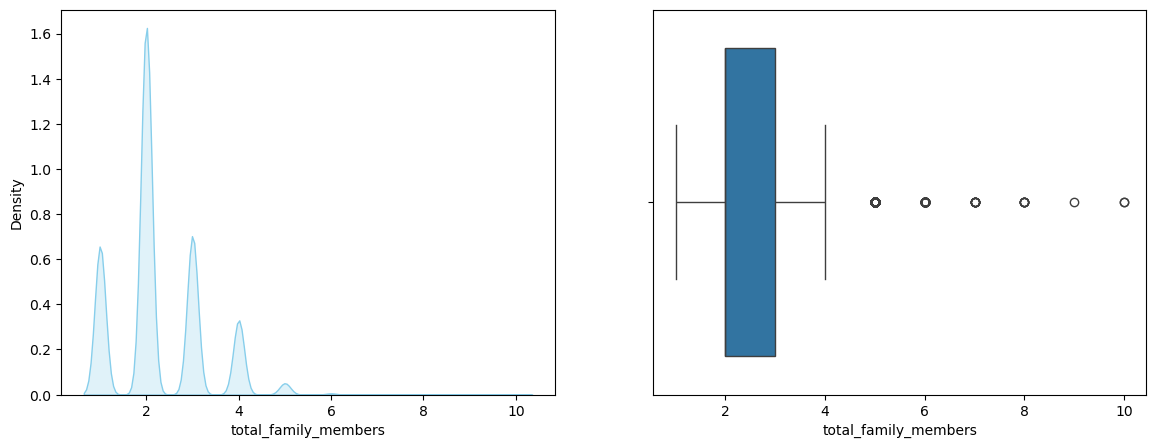

In [192]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,5))

sns.kdeplot(df['total_family_members'], fill = True, color = 'skyblue', ax = ax[0])
sns.boxplot(df['total_family_members'], orient = 'h', ax = ax[1])

plt.show()

In [193]:
# removing the few rows with outliers from the 'total_family_members' column as they can increase model complexity
df = df[df['total_family_members'] < 6]

In [194]:
df.isnull().sum()

age                          0
gender                       0
owns_car                   412
owns_house                   0
no_of_children             593
net_yearly_income            0
no_of_days_employed          0
occupation_type              0
total_family_members         0
migrant_worker              56
yearly_debt_payments         0
credit_limit                 0
credit_limit_used(%)         0
credit_score                 0
prev_defaults                0
default_in_last_6months      0
default                      0
dtype: int64

In [195]:
df['no_of_children'].value_counts()

no_of_children
0.0    21232
1.0     8173
2.0     3546
3.0      524
4.0        5
Name: count, dtype: int64

In [196]:
df.groupby('no_of_children')['default'].mean()

no_of_children
0.0    0.087933
1.0    0.095926
2.0    0.089114
3.0    0.083969
4.0    0.200000
Name: default, dtype: float64

In [197]:
df[~df['no_of_children'].isnull()]['default'].mean()

0.08996415770609319

In [198]:
# filling null values in 'number_of_children' with 0 assuming(for now) they have no children
df['no_of_children'].fillna(0, inplace = True)

C:\Users\PARVEZ KHAN\AppData\Local\Temp\ipykernel_11564\3823255191.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_of_children'].fillna(0, inplace = True)


In [199]:
# removing the few rows with outliers from the 'no_of_children' column as they can increase model complexity
df = df[df['no_of_children'] < 4]

In [200]:
df['migrant_worker'].value_counts()

migrant_worker
0.0    26432
1.0     7580
Name: count, dtype: int64

In [201]:
df.groupby('migrant_worker')['default'].mean()

migrant_worker
0.0    0.086108
1.0    0.103958
Name: default, dtype: float64

In [202]:
df[df['migrant_worker'].isnull()]['default'].mean()

0.05357142857142857

In [203]:
# filling null values in 'migrant_worker' with 0 assuming they are not migrant workers
df['migrant_worker'].fillna(0, inplace = True)

C:\Users\PARVEZ KHAN\AppData\Local\Temp\ipykernel_11564\2630727949.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['migrant_worker'].fillna(0, inplace = True)


In [204]:
df.isnull().sum()

age                          0
gender                       0
owns_car                   412
owns_house                   0
no_of_children               0
net_yearly_income            0
no_of_days_employed          0
occupation_type              0
total_family_members         0
migrant_worker               0
yearly_debt_payments         0
credit_limit                 0
credit_limit_used(%)         0
credit_score                 0
prev_defaults                0
default_in_last_6months      0
default                      0
dtype: int64

In [205]:
df['owns_car'].value_counts()

owns_car
N    21068
Y    12588
Name: count, dtype: int64

In [206]:
df.groupby('owns_car')['default'].mean()

owns_car
N    0.096355
Y    0.079361
Name: default, dtype: float64

In [207]:
df[df['owns_car'].isnull()]['default'].mean()

0.09223300970873786

In [208]:
# filling null values in 'owns_car' with 'N' as the average ratio of defaulters is almost same as those who don't own a car
df['owns_car'].fillna('N', inplace = True)

C:\Users\PARVEZ KHAN\AppData\Local\Temp\ipykernel_11564\1424434924.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['owns_car'].fillna('N', inplace = True)


In [209]:
df.isnull().sum()

age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
default                    0
dtype: int64

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34068 entries, 0 to 45527
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      34068 non-null  int64  
 1   gender                   34068 non-null  object 
 2   owns_car                 34068 non-null  object 
 3   owns_house               34068 non-null  object 
 4   no_of_children           34068 non-null  float64
 5   net_yearly_income        34068 non-null  float64
 6   no_of_days_employed      34068 non-null  float64
 7   occupation_type          34068 non-null  object 
 8   total_family_members     34068 non-null  float64
 9   migrant_worker           34068 non-null  float64
 10  yearly_debt_payments     34068 non-null  float64
 11  credit_limit             34068 non-null  float64
 12  credit_limit_used(%)     34068 non-null  int64  
 13  credit_score             34068 non-null  float64
 14  prev_defaults            34

### EDA and Feature Engineering

#### Categorical Columns

In [211]:
df['gender'].value_counts()

gender
F      21037
M      13030
XNA        1
Name: count, dtype: int64

In [212]:
df = df[~(df['gender'] == 'XNA')]

In [213]:
df.groupby('gender')['default'].mean().sort_values(ascending = False)

gender
M    0.108672
F    0.078481
Name: default, dtype: float64

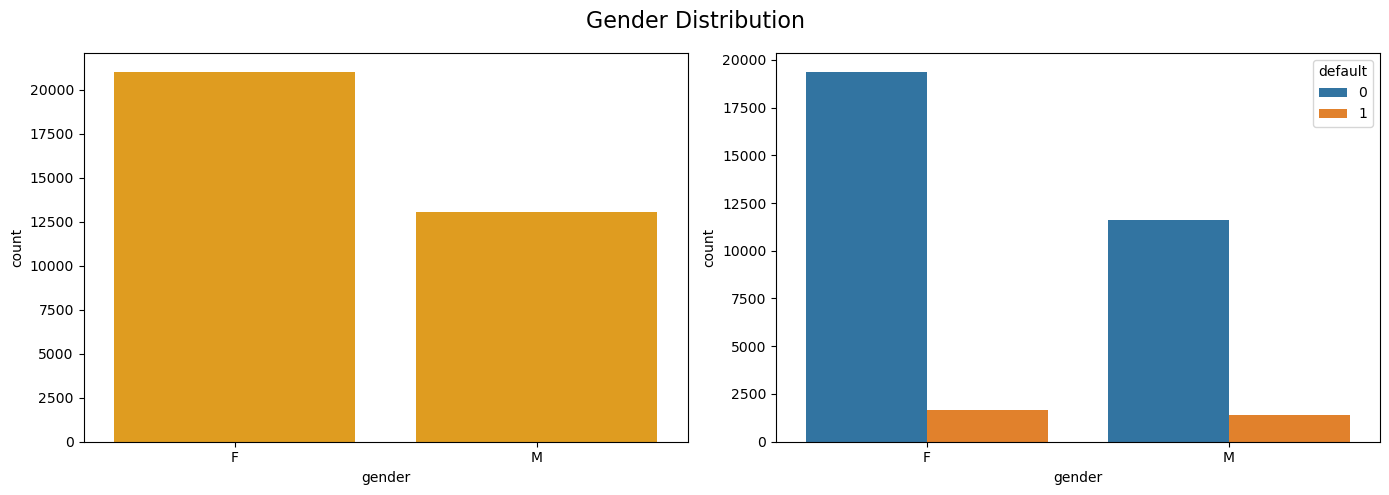

In [214]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 5))

sns.countplot(data = df, x = 'gender', color = 'orange', ax = ax[0])
sns.countplot(data = df, x = 'gender', hue = 'default', ax = ax[1])

fig.suptitle('Gender Distribution', fontsize=16)

plt.tight_layout()
plt.show()

In [215]:
df['owns_car'].value_counts()

owns_car
N    21479
Y    12588
Name: count, dtype: int64

In [216]:
df.groupby('owns_car')['default'].mean().sort_values(ascending = False)

owns_car
N    0.096280
Y    0.079361
Name: default, dtype: float64

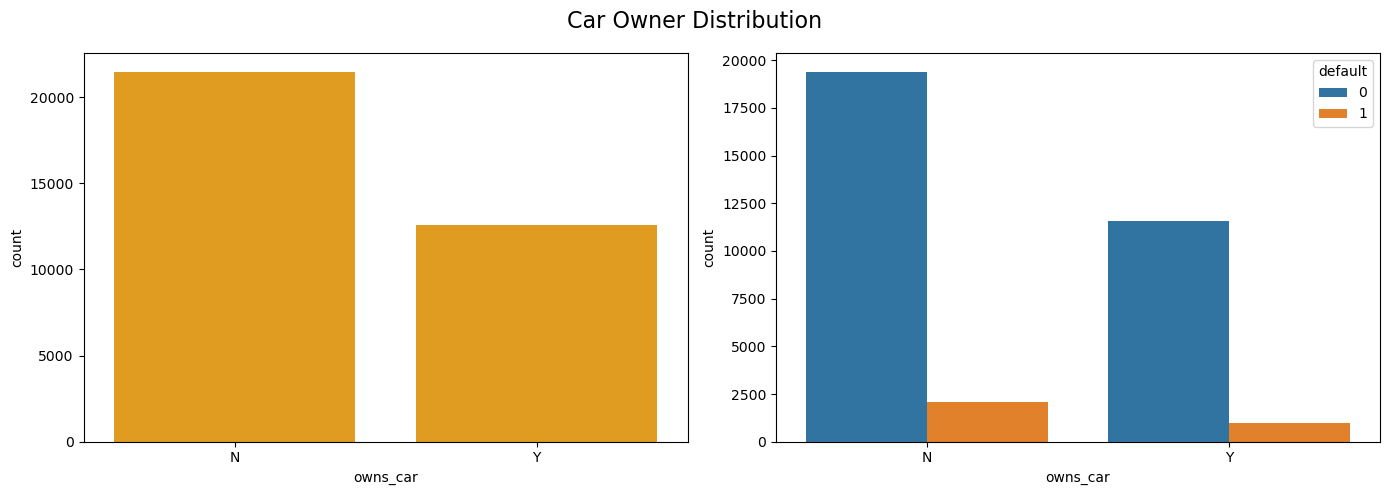

In [217]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 5))

sns.countplot(data = df, x = 'owns_car', color = 'orange', ax = ax[0])
sns.countplot(data = df, x = 'owns_car', hue = 'default', ax = ax[1])

fig.suptitle('Car Owner Distribution', fontsize=16)

plt.tight_layout()
plt.show()

In [218]:
df['owns_house'].value_counts()

owns_house
Y    23142
N    10925
Name: count, dtype: int64

In [219]:
df.groupby('owns_house')['default'].mean().sort_values(ascending = False)

owns_house
Y    0.090269
N    0.089519
Name: default, dtype: float64

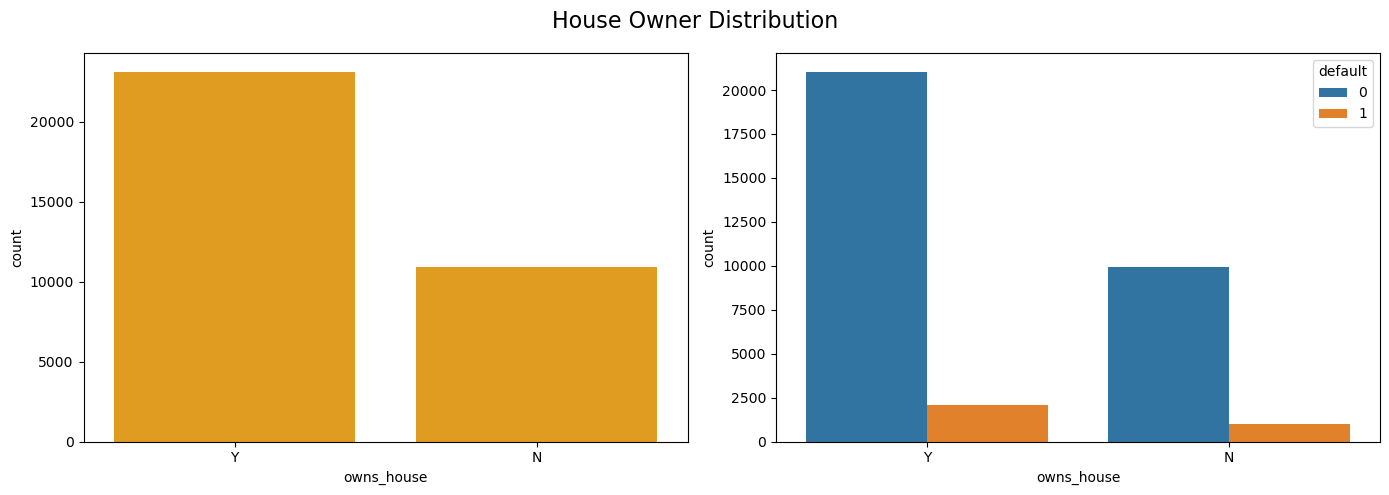

In [220]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 5))

sns.countplot(data = df, x = 'owns_house', color = 'orange', ax = ax[0])
sns.countplot(data = df, x = 'owns_house', hue = 'default', ax = ax[1])

fig.suptitle('House Owner Distribution', fontsize=16)

plt.tight_layout()
plt.show()

In [221]:
df['total_family_members'].value_counts()

total_family_members
2.0    16469
3.0     7114
1.0     6647
4.0     3332
5.0      505
Name: count, dtype: int64

In [222]:
df.groupby('total_family_members')['default'].mean().sort_values(ascending = False)

total_family_members
1.0    0.097488
3.0    0.092072
4.0    0.088535
2.0    0.086587
5.0    0.085149
Name: default, dtype: float64

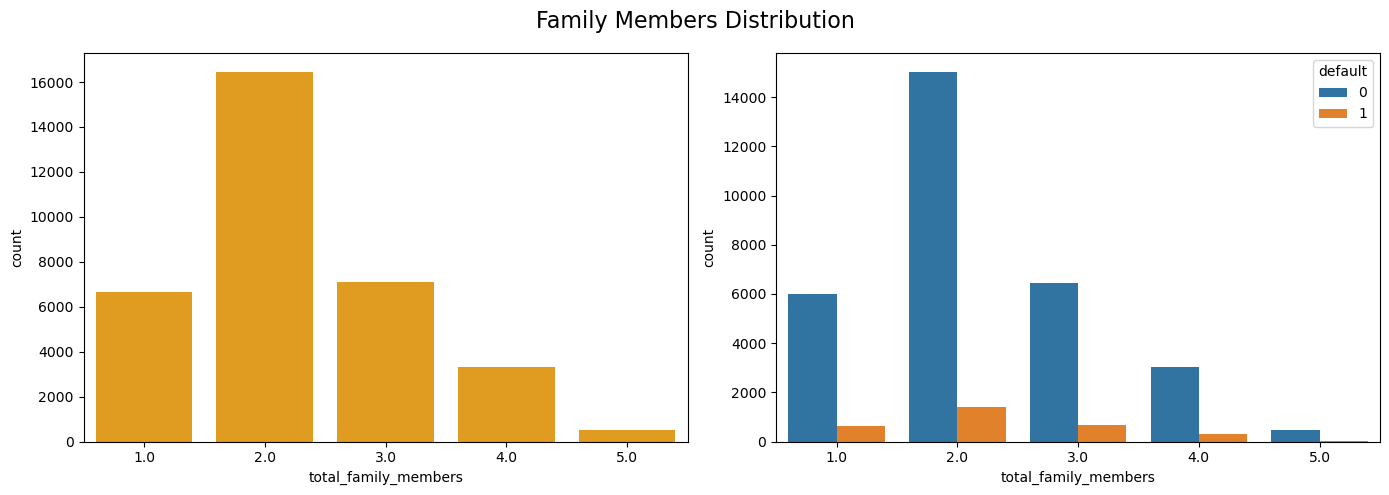

In [223]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 5))
sns.countplot(data = df, x = 'total_family_members', color = 'orange', ax = ax[0])
sns.countplot(data = df, x = 'total_family_members', hue = 'default', ax = ax[1])

fig.suptitle('Family Members Distribution', fontsize=16)

plt.tight_layout()
plt.show()

In [224]:
df['no_of_children'].value_counts()

no_of_children
0.0    21825
1.0     8173
2.0     3545
3.0      524
Name: count, dtype: int64

In [225]:
df.groupby('no_of_children')['default'].mean().sort_values(ascending = False)

no_of_children
1.0    0.095926
2.0    0.089140
0.0    0.088110
3.0    0.083969
Name: default, dtype: float64

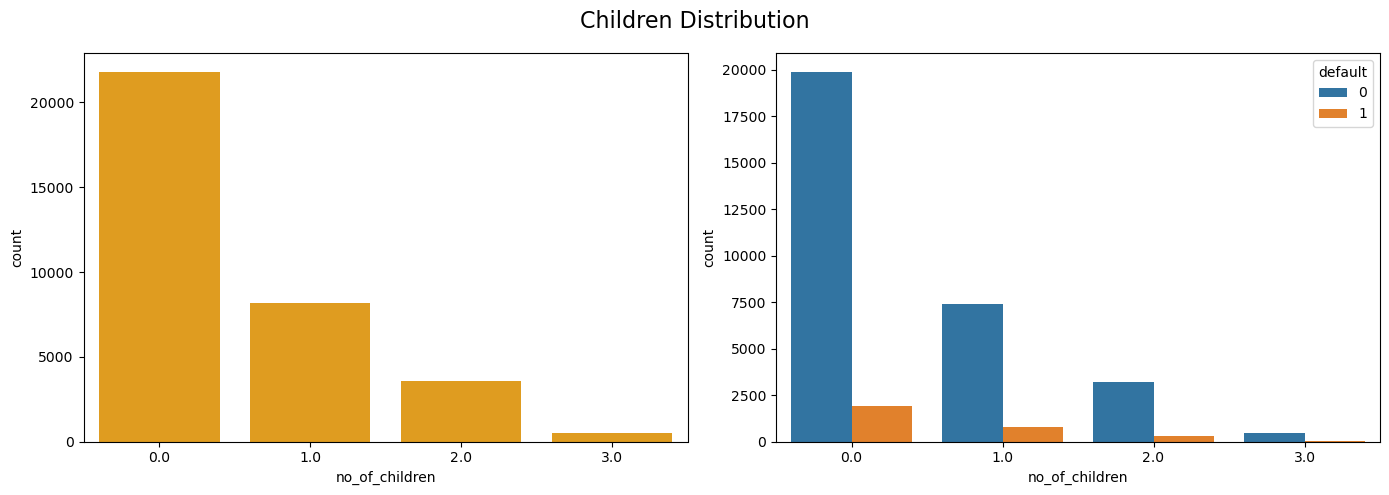

In [226]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 5))
sns.countplot(data = df, x = 'no_of_children', color = 'orange', ax = ax[0])
sns.countplot(data = df, x = 'no_of_children', hue = 'default', ax = ax[1])

fig.suptitle('Children Distribution', fontsize=16)

plt.tight_layout()
plt.show()

In [227]:
df['occupation_type'].value_counts()

occupation_type
Laborers                 7360
Unknown                  5565
Sales staff              4517
Core staff               3600
Managers                 2836
Drivers                  2590
High skill tech staff    1489
Accountants              1363
Medicine staff           1045
Security staff            982
Cooking staff             833
Cleaning staff            608
Private service staff     361
Low-skill Laborers        316
Waiters/barmen staff      197
Secretaries               177
Realty agents              94
HR staff                   74
IT staff                   60
Name: count, dtype: int64

In [228]:
df.groupby('occupation_type')['default'].mean().sort_values(ascending = False)

occupation_type
Low-skill Laborers       0.164557
Drivers                  0.120077
Cooking staff            0.114046
Laborers                 0.108288
Security staff           0.106925
Waiters/barmen staff     0.106599
Realty agents            0.106383
Cleaning staff           0.101974
Sales staff              0.097853
HR staff                 0.094595
Medicine staff           0.085167
Unknown                  0.080503
Private service staff    0.080332
Managers                 0.069817
High skill tech staff    0.065816
Core staff               0.061667
Accountants              0.053558
Secretaries              0.033898
IT staff                 0.033333
Name: default, dtype: float64

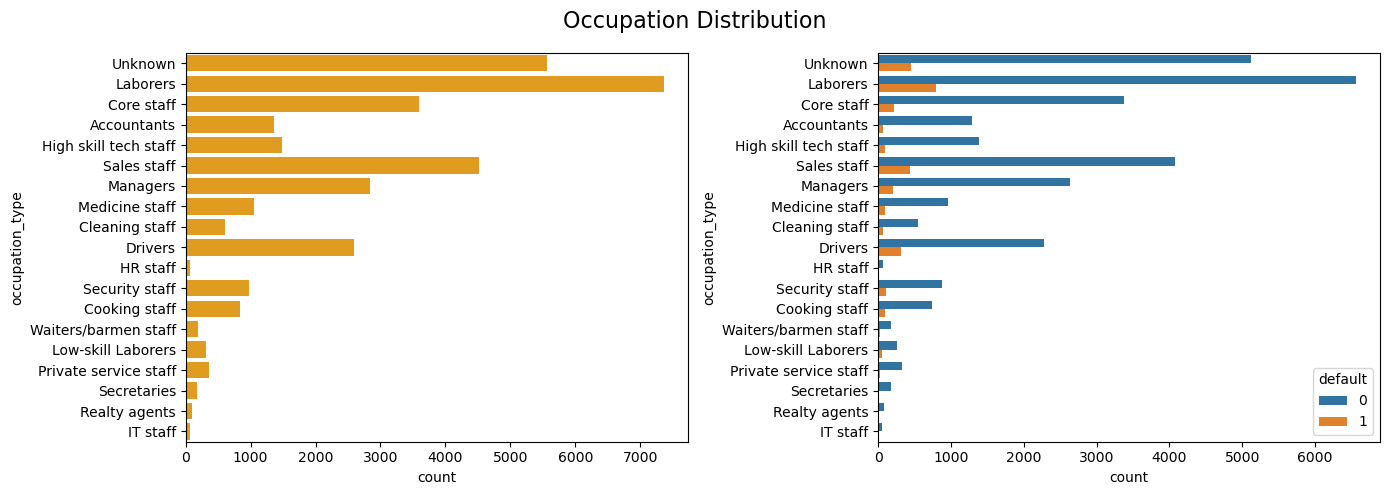

In [229]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 5))

sns.countplot(data = df, y = 'occupation_type', color = 'orange', ax = ax[0])
sns.countplot(data = df, y = 'occupation_type', hue = 'default', ax = ax[1])

fig.suptitle('Occupation Distribution', fontsize=16)

plt.tight_layout()
plt.show()

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34067 entries, 0 to 45527
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      34067 non-null  int64  
 1   gender                   34067 non-null  object 
 2   owns_car                 34067 non-null  object 
 3   owns_house               34067 non-null  object 
 4   no_of_children           34067 non-null  float64
 5   net_yearly_income        34067 non-null  float64
 6   no_of_days_employed      34067 non-null  float64
 7   occupation_type          34067 non-null  object 
 8   total_family_members     34067 non-null  float64
 9   migrant_worker           34067 non-null  float64
 10  yearly_debt_payments     34067 non-null  float64
 11  credit_limit             34067 non-null  float64
 12  credit_limit_used(%)     34067 non-null  int64  
 13  credit_score             34067 non-null  float64
 14  prev_defaults            34

In [231]:
df['migrant_worker'].value_counts()

migrant_worker
0.0    26487
1.0     7580
Name: count, dtype: int64

In [232]:
df.groupby('migrant_worker')['default'].mean().sort_values(ascending = False)

migrant_worker
1.0    0.103958
0.0    0.086042
Name: default, dtype: float64

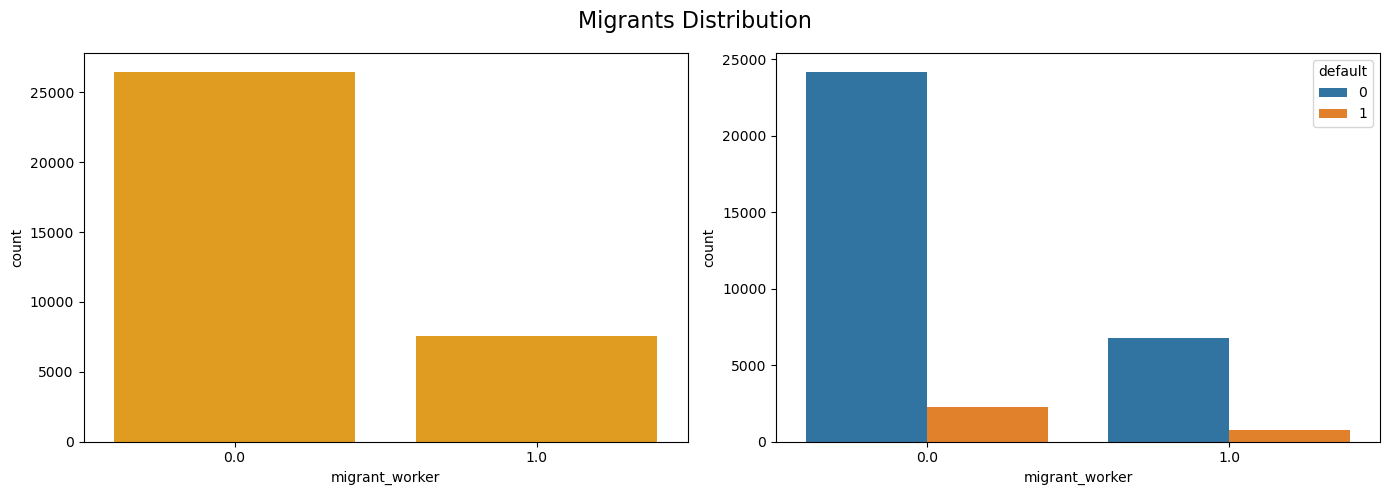

In [233]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 5))

sns.countplot(data = df, x = 'migrant_worker', color = 'orange', ax = ax[0])
sns.countplot(data = df, x = 'migrant_worker', hue = 'default', ax = ax[1])

fig.suptitle('Migrants Distribution', fontsize=16)

plt.tight_layout()
plt.show()

In [234]:
df['prev_defaults'].value_counts()

prev_defaults
0    32015
1     1805
2      247
Name: count, dtype: int64

In [235]:
df.groupby('prev_defaults')['default'].mean().sort_values(ascending = False)

prev_defaults
1    1.000000
2    1.000000
0    0.031704
Name: default, dtype: float64

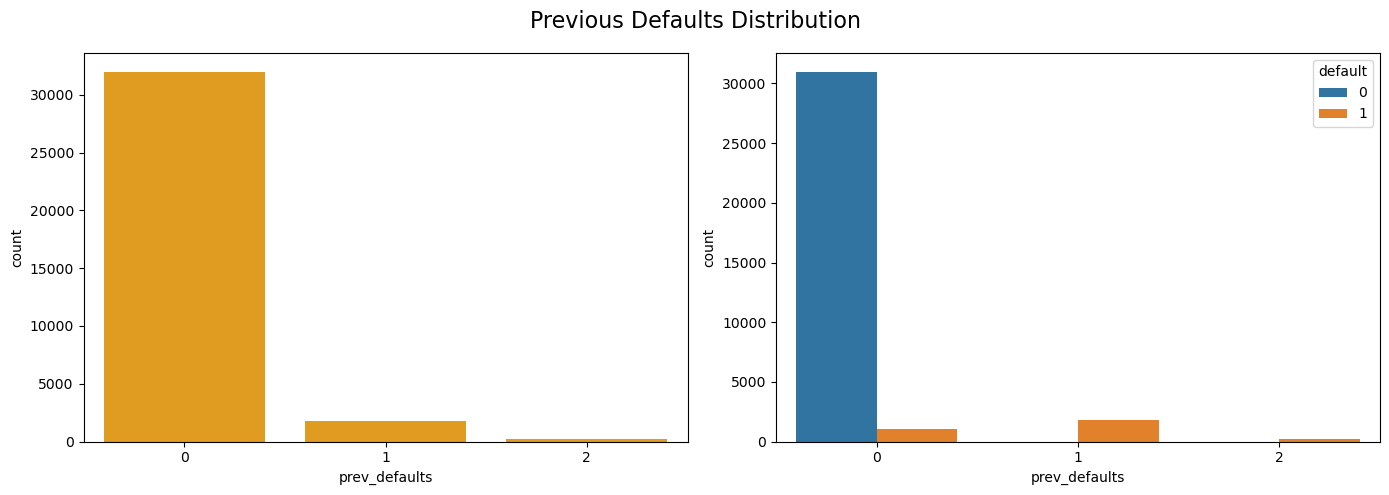

In [236]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 5))
sns.countplot(data = df, x = 'prev_defaults', color = 'orange', ax = ax[0])
sns.countplot(data = df, x = 'prev_defaults', hue = 'default', ax = ax[1])

fig.suptitle('Previous Defaults Distribution', fontsize=16)

plt.tight_layout()
plt.show()

In [237]:
df['default_in_last_6months'].value_counts()

default_in_last_6months
0    32159
1     1908
Name: count, dtype: int64

In [238]:
df.groupby('default_in_last_6months')['default'].mean().sort_values(ascending = False)

default_in_last_6months
1    1.00000
0    0.03604
Name: default, dtype: float64

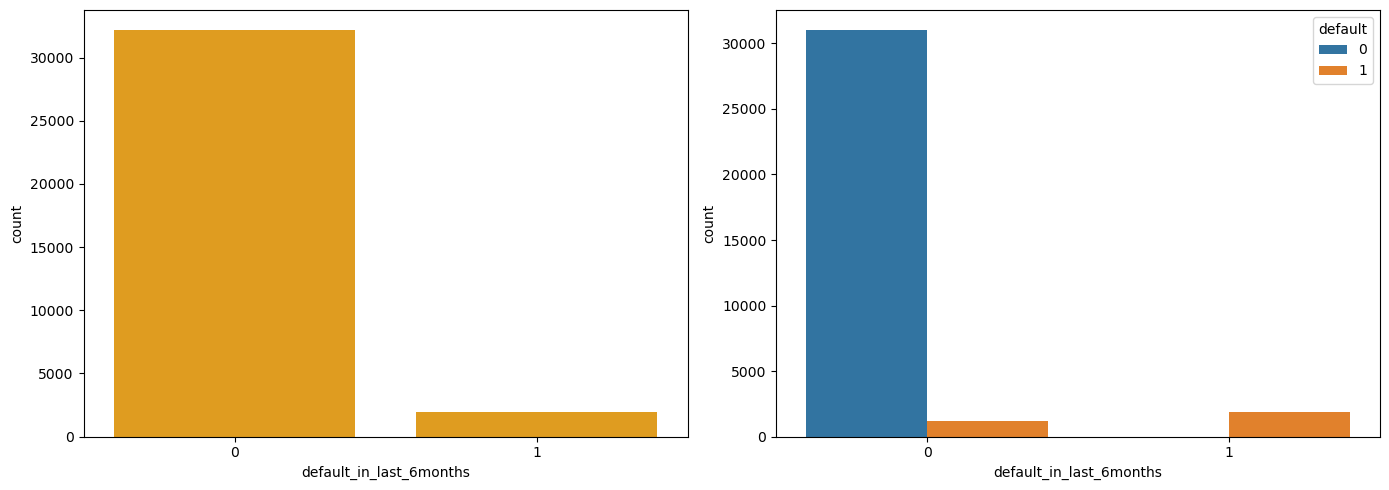

In [239]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 5))

sns.countplot(data = df, x = 'default_in_last_6months', color = 'orange', ax = ax[0])
sns.countplot(data = df, x = 'default_in_last_6months', hue = 'default', ax = ax[1])

plt.tight_layout()
plt.show()

In [240]:
df['default'].value_counts()

default
0    31000
1     3067
Name: count, dtype: int64

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34067 entries, 0 to 45527
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      34067 non-null  int64  
 1   gender                   34067 non-null  object 
 2   owns_car                 34067 non-null  object 
 3   owns_house               34067 non-null  object 
 4   no_of_children           34067 non-null  float64
 5   net_yearly_income        34067 non-null  float64
 6   no_of_days_employed      34067 non-null  float64
 7   occupation_type          34067 non-null  object 
 8   total_family_members     34067 non-null  float64
 9   migrant_worker           34067 non-null  float64
 10  yearly_debt_payments     34067 non-null  float64
 11  credit_limit             34067 non-null  float64
 12  credit_limit_used(%)     34067 non-null  int64  
 13  credit_score             34067 non-null  float64
 14  prev_defaults            34

#### Numerical Columns

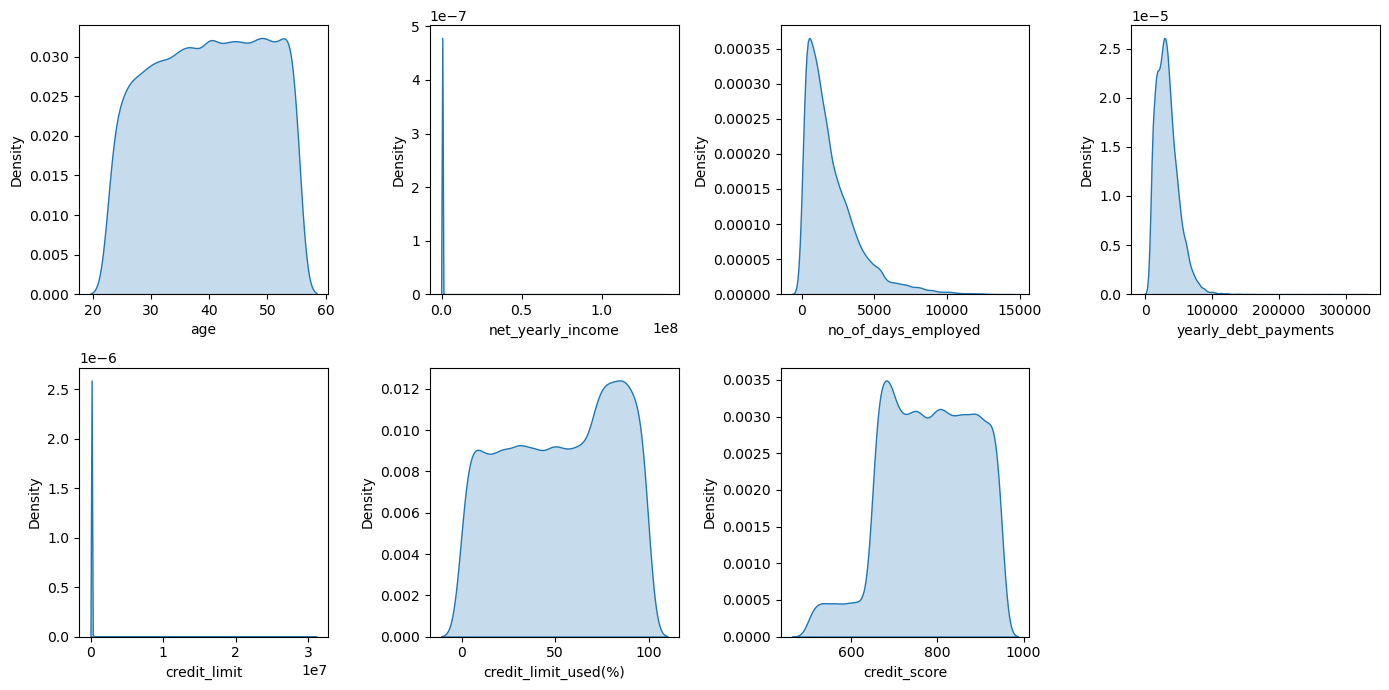

In [242]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(14, 7))

sns.kdeplot(df['age'], fill=True, ax=ax[0, 0])
sns.kdeplot(df['net_yearly_income'], fill=True, ax=ax[0, 1])
sns.kdeplot(df['no_of_days_employed'], fill=True, ax=ax[0, 2])
sns.kdeplot(df['yearly_debt_payments'], fill=True, ax=ax[0, 3])
sns.kdeplot(df['credit_limit'], fill=True, ax=ax[1, 0])
sns.kdeplot(df['credit_limit_used(%)'], fill=True, ax=ax[1, 1])
sns.kdeplot(df['credit_score'], fill=True, ax=ax[1, 2])
ax[1, 3].remove()

plt.tight_layout()
plt.show()

In [243]:
df.sample(5)

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,default
10120,38,F,N,Y,0.0,137776.89,1503.0,Unknown,2.0,0.0,30638.22,27817.33,74,581.0,1,1,1
33326,39,M,Y,Y,0.0,271007.36,4010.0,Drivers,2.0,0.0,55479.94,89886.91,9,838.0,0,0,0
27984,52,F,N,N,0.0,159328.85,2593.0,High skill tech staff,2.0,0.0,24306.78,54755.58,87,679.0,0,0,0
1434,36,F,Y,Y,0.0,71292.68,1859.0,Medicine staff,2.0,0.0,19299.74,19264.81,37,867.0,0,0,0
30417,55,F,N,Y,0.0,212386.20,3347.0,Sales staff,2.0,1.0,19799.44,27442.60,2,699.0,0,0,0


<Axes: >

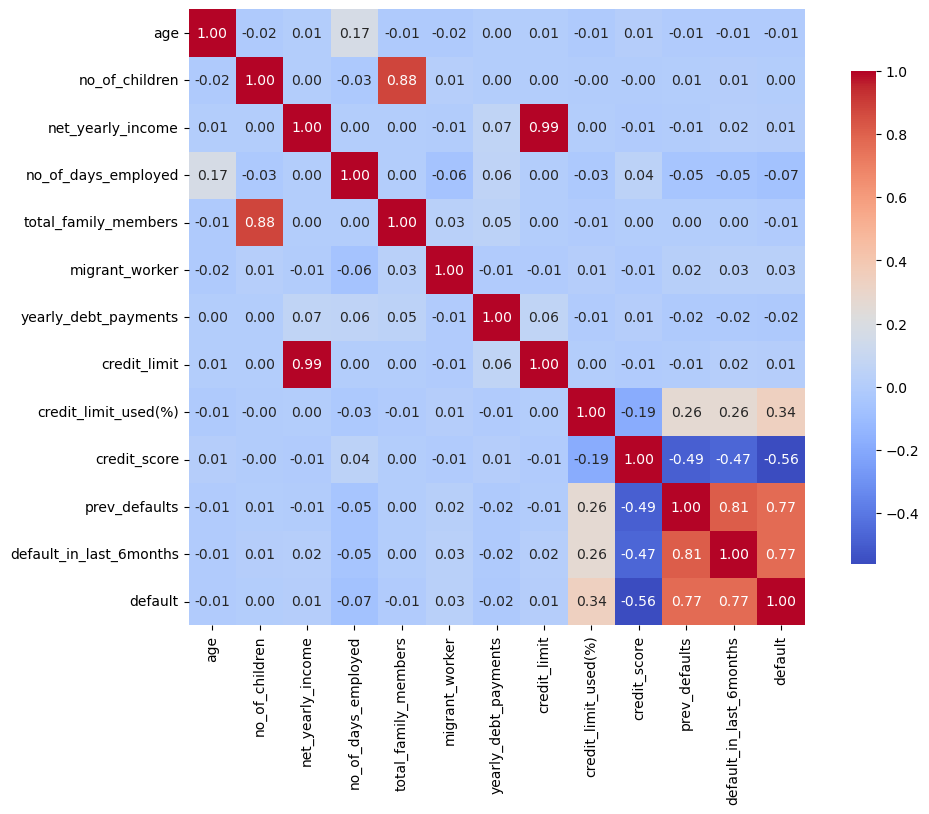

In [244]:
corr_matrix = df.corr(numeric_only = True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

#### Check for Multicolinearity

In [245]:
X = df.drop(columns = ['gender', 'owns_car', 'owns_house', 'occupation_type', 'default'])

X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                   Variable         VIF
0                     const  124.006521
1                       age    1.031053
2            no_of_children    4.487529
3         net_yearly_income   93.845312
4       no_of_days_employed    1.045273
5      total_family_members    4.497697
6            migrant_worker    1.006456
7      yearly_debt_payments    1.016848
8              credit_limit   93.831059
9      credit_limit_used(%)    1.086681
10             credit_score    1.342083
11            prev_defaults    3.124189
12  default_in_last_6months    3.042695


### Model Fitting

#### Train-Test Split

In [246]:
X = df.drop(columns = ['default'])
y = df['default']

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 44)

#### Oversampling using SMOTE to handle imbalanced data

In [249]:
smote = SMOTENC(categorical_features = ['gender', 'owns_car', 'owns_house', 'occupation_type', 'migrant_worker','total_family_members', 
                                        'no_of_children', 'prev_defaults','default_in_last_6months'], random_state = 44)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [250]:
print(f"No. of Observbations before Resampling: {len(X_train)}")
print(f"No. of Observbations after Resampling: {len(X_train_res)}")

No. of Observbations before Resampling: 25550
No. of Observbations after Resampling: 46480


#### Encoding and Scaling

In [251]:
trf = ColumnTransformer([
    ('ehe', OneHotEncoder(drop = 'first', sparse_output = False), ['gender', 'owns_car', 'owns_house']),

    ('oe', OrdinalEncoder(categories = [['IT staff', 'Secretaries', 'Accountants', 'Core staff',
       'High skill tech staff', 'Managers', 'Private service staff', 'Unknown', 'Medicine staff', 
       'HR staff', 'Sales staff', 'Cleaning staff', 'Realty agents', 'Waiters/barmen staff', 
       'Security staff', 'Laborers', 'Cooking staff', 'Drivers', 'Low-skill Laborers']]), ['occupation_type']),

    ('scaling', StandardScaler(), ['age', 'net_yearly_income', 'no_of_days_employed', 'yearly_debt_payments',
       'credit_limit', 'credit_limit_used(%)', 'credit_score'])
       
], remainder = 'passthrough')

In [164]:
lg = LogisticRegression()

In [252]:
pipe = ImbPipeline([
    ('trf', trf),
    ('model', lg)
])

In [253]:
pipe.fit(X_train, y_train)

,steps,"[('trf', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ehe', ...), ('oe', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [255]:
from sklearn.model_selection import cross_val_score

cross_val_score(pipe, X_train_res, y_train_res, scoring = 'recall').mean()

0.9717728055077453

In [256]:
rf = RandomForestClassifier()

In [257]:
pipe = ImbPipeline([
    ('trf', trf),
    ('model', rf)
])

In [258]:
pipe.fit(X_train, y_train)

,steps,"[('trf', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ehe', ...), ('oe', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [259]:
cross_val_score(pipe, X_train_res, y_train_res, scoring = 'recall').mean()

0.981368330464716